## Visualization

This code creates the visualization of the results

In [175]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
#ignore warnings
import warnings
warnings.filterwarnings('ignore')

PATH_VIT_PRED = "../data/mimic-cxr-jpg/pred_vit.csv"
PATH_COMBINED_VIT_PRED = "../data/mimic-cxr-jpg/pred_combined_vit.csv"
PATH_RESNET_PRED = "../data/mimic-cxr-jpg/pred_resnet.csv"
PATH_DENSENET_PRED = "../data/mimic-cxr-jpg/pred_densenet.csv"
PATH_TABULAR_PRED = "../data/mimic-cxr-jpg/pred_tabular.csv"
PATH_COMBINED_RESNET_PRED = "../data/mimic-cxr-jpg/pred_combined_resnet.csv"
PATH_COMBINED_DENSENET_PRED = "../data/mimic-cxr-jpg/pred_combined_densenet.csv"
PATH_LABELS = "../data/mimic-cxr-jpg/labels.csv"

labels = pd.read_csv(PATH_LABELS)
vit_pred = pd.read_csv(PATH_VIT_PRED)
combined_vit_pred = pd.read_csv(PATH_COMBINED_VIT_PRED)
resnet_pred = pd.read_csv(PATH_RESNET_PRED)
densenet_pred = pd.read_csv(PATH_DENSENET_PRED)
tabular_pred = pd.read_csv(PATH_TABULAR_PRED)
combined_resnet_pred = pd.read_csv(PATH_COMBINED_RESNET_PRED)
combined_densenet_pred = pd.read_csv(PATH_COMBINED_DENSENET_PRED)


## Visualization 1: bar chart of balanced accuracy per disease

In [176]:
# import balance_accuracy
from sklearn.metrics import balanced_accuracy_score
# import macro_f1
from sklearn.metrics import f1_score
# import macro precision
from sklearn.metrics import precision_score
# import macro recall
from sklearn.metrics import recall_score

# each column of labels, vision_pred and combined_pred is a list of predictions for a specific disease. The disease is the column name.
# Compute the balanced accuracy for each disease and store it in a list
results_vit = {}
results_combined_vit = {}
results_resnet = {}
results_densenet = {}
results_tabular = {}
results_combined_resnet = {}
results_combined_densenet = {}

 
metrics = ['balanced accuracy', 'macro f1', 'macro precision', 'macro recall']

for metric in metrics:
    # set all values to 0
    results_vit[metric] = 0
    results_combined_vit[metric] = 0
    results_resnet[metric] = 0
    results_densenet[metric] = 0
    results_tabular[metric] = 0
    results_combined_resnet[metric] = 0
    results_combined_densenet[metric] = 0

    if metric == 'balanced accuracy':
        for column in labels:
            results_vit[metric] += balanced_accuracy_score(labels[column], vit_pred[column])
            results_combined_vit[metric] += balanced_accuracy_score(labels[column], combined_vit_pred[column])
            results_resnet[metric] += balanced_accuracy_score(labels[column], resnet_pred[column])
            results_densenet[metric] += balanced_accuracy_score(labels[column], densenet_pred[column])
            results_tabular[metric] += balanced_accuracy_score(labels[column], tabular_pred[column])
            results_combined_resnet[metric] += balanced_accuracy_score(labels[column], combined_resnet_pred[column])
            results_combined_densenet[metric] += balanced_accuracy_score(labels[column], combined_densenet_pred[column])

        # average over all diseases
        results_vit[metric] /= len(labels.columns)
        results_combined_vit[metric] /= len(labels.columns)
        results_resnet[metric] /= len(labels.columns)
        results_densenet[metric] /= len(labels.columns)
        results_tabular[metric] /= len(labels.columns)
        results_combined_resnet[metric] /= len(labels.columns)
        results_combined_densenet[metric] /= len(labels.columns)

    elif metric == 'macro f1':
        # set all values to 0
        results_vit[metric] = 0
        results_combined_vit[metric] = 0
        results_resnet[metric] = 0
        results_densenet[metric] = 0
        results_tabular[metric] = 0
        results_combined_resnet[metric] = 0
        results_combined_densenet[metric] = 0

        for column in labels:
            results_vit[metric] += f1_score(labels[column], vit_pred[column], average='macro')
            results_combined_vit[metric] += f1_score(labels[column], combined_vit_pred[column], average='macro')
            results_resnet[metric] += f1_score(labels[column], resnet_pred[column], average='macro')
            results_densenet[metric] += f1_score(labels[column], densenet_pred[column], average='macro')
            results_tabular[metric] += f1_score(labels[column], tabular_pred[column], average='macro')
            results_combined_resnet[metric] += f1_score(labels[column], combined_resnet_pred[column], average='macro')
            results_combined_densenet[metric] += f1_score(labels[column], combined_densenet_pred[column], average='macro')

        # average over all diseases
        results_vit[metric] /= len(labels.columns)
        results_combined_vit[metric] /= len(labels.columns)
        results_resnet[metric] /= len(labels.columns)
        results_densenet[metric] /= len(labels.columns)
        results_tabular[metric] /= len(labels.columns)
        results_combined_resnet[metric] /= len(labels.columns)
        results_combined_densenet[metric] /= len(labels.columns)

    elif metric == 'macro precision':
        # set all values to 0
        results_vit[metric] = 0
        results_combined_vit[metric] = 0
        results_resnet[metric] = 0
        results_densenet[metric] = 0
        results_tabular[metric] = 0
        results_combined_resnet[metric] = 0
        results_combined_densenet[metric] = 0

        for column in labels:
            results_vit[metric] += precision_score(labels[column], vit_pred[column], average='macro')
            results_combined_vit[metric] += precision_score(labels[column], combined_vit_pred[column], average='macro')
            results_resnet[metric] += precision_score(labels[column], resnet_pred[column], average='macro')
            results_densenet[metric] += precision_score(labels[column], densenet_pred[column], average='macro')
            results_tabular[metric] += precision_score(labels[column], tabular_pred[column], average='macro')
            results_combined_resnet[metric] += precision_score(labels[column], combined_resnet_pred[column], average='macro')
            results_combined_densenet[metric] += precision_score(labels[column], combined_densenet_pred[column], average='macro')

        # average over all diseases
        results_vit[metric] /= len(labels.columns)
        results_combined_vit[metric] /= len(labels.columns)
        results_resnet[metric] /= len(labels.columns)
        results_densenet[metric] /= len(labels.columns)
        results_tabular[metric] /= len(labels.columns)
        results_combined_resnet[metric] /= len(labels.columns)
        results_combined_densenet[metric] /= len(labels.columns)

    elif metric == 'macro recall':
        # set all values to 0
        results_vit[metric] = 0
        results_combined_vit[metric] = 0
        results_resnet[metric] = 0
        results_densenet[metric] = 0
        results_tabular[metric] = 0
        results_combined_resnet[metric] = 0
        results_combined_densenet[metric] = 0

        for column in labels:
            results_vit[metric] += recall_score(labels[column], vit_pred[column], average='macro')
            results_combined_vit[metric] += recall_score(labels[column], combined_vit_pred[column], average='macro')
            results_resnet[metric] += recall_score(labels[column], resnet_pred[column], average='macro')
            results_densenet[metric] += recall_score(labels[column], densenet_pred[column], average='macro')
            results_tabular[metric] += recall_score(labels[column], tabular_pred[column], average='macro')
            results_combined_resnet[metric] += recall_score(labels[column], combined_resnet_pred[column], average='macro')
            results_combined_densenet[metric] += recall_score(labels[column], combined_densenet_pred[column], average='macro')

        # average over all diseases
        results_vit[metric] /= len(labels.columns)
        results_combined_vit[metric] /= len(labels.columns)
        results_resnet[metric] /= len(labels.columns)
        results_densenet[metric] /= len(labels.columns)
        results_tabular[metric] /= len(labels.columns)
        results_combined_resnet[metric] /= len(labels.columns)
        results_combined_densenet[metric] /= len(labels.columns)

    # Now we want to make a pandas dataframe with the results, the rows are the models and the columns are the metrics
    results = pd.DataFrame(columns=metrics)
    results.loc['ViT'] = results_vit
    results.loc['combined ViT'] = results_combined_vit
    results.loc['ResNet'] = results_resnet
    results.loc['DenseNet'] = results_densenet
    results.loc['Tabular'] = results_tabular
    results.loc['combined ResNet'] = results_combined_resnet
    results.loc['combined DenseNet'] = results_combined_densenet




In [147]:
results

,balanced accuracy,macro f1,macro precision,macro recall
ViT,0.826281,0.589216,0.560879,0.807241
combined ViT,0.860766,0.634986,0.600275,0.840294
ResNet,0.722525,0.501834,0.498622,0.706163
DenseNet,0.760402,0.526254,0.515243,0.742153
Tabular,0.444729,0.302433,0.366290,0.434563
combined ResNet,0.785715,0.551410,0.532491,0.767393
combined DenseNet,0.851848,0.613015,0.581016,0.832121


## Plot 2

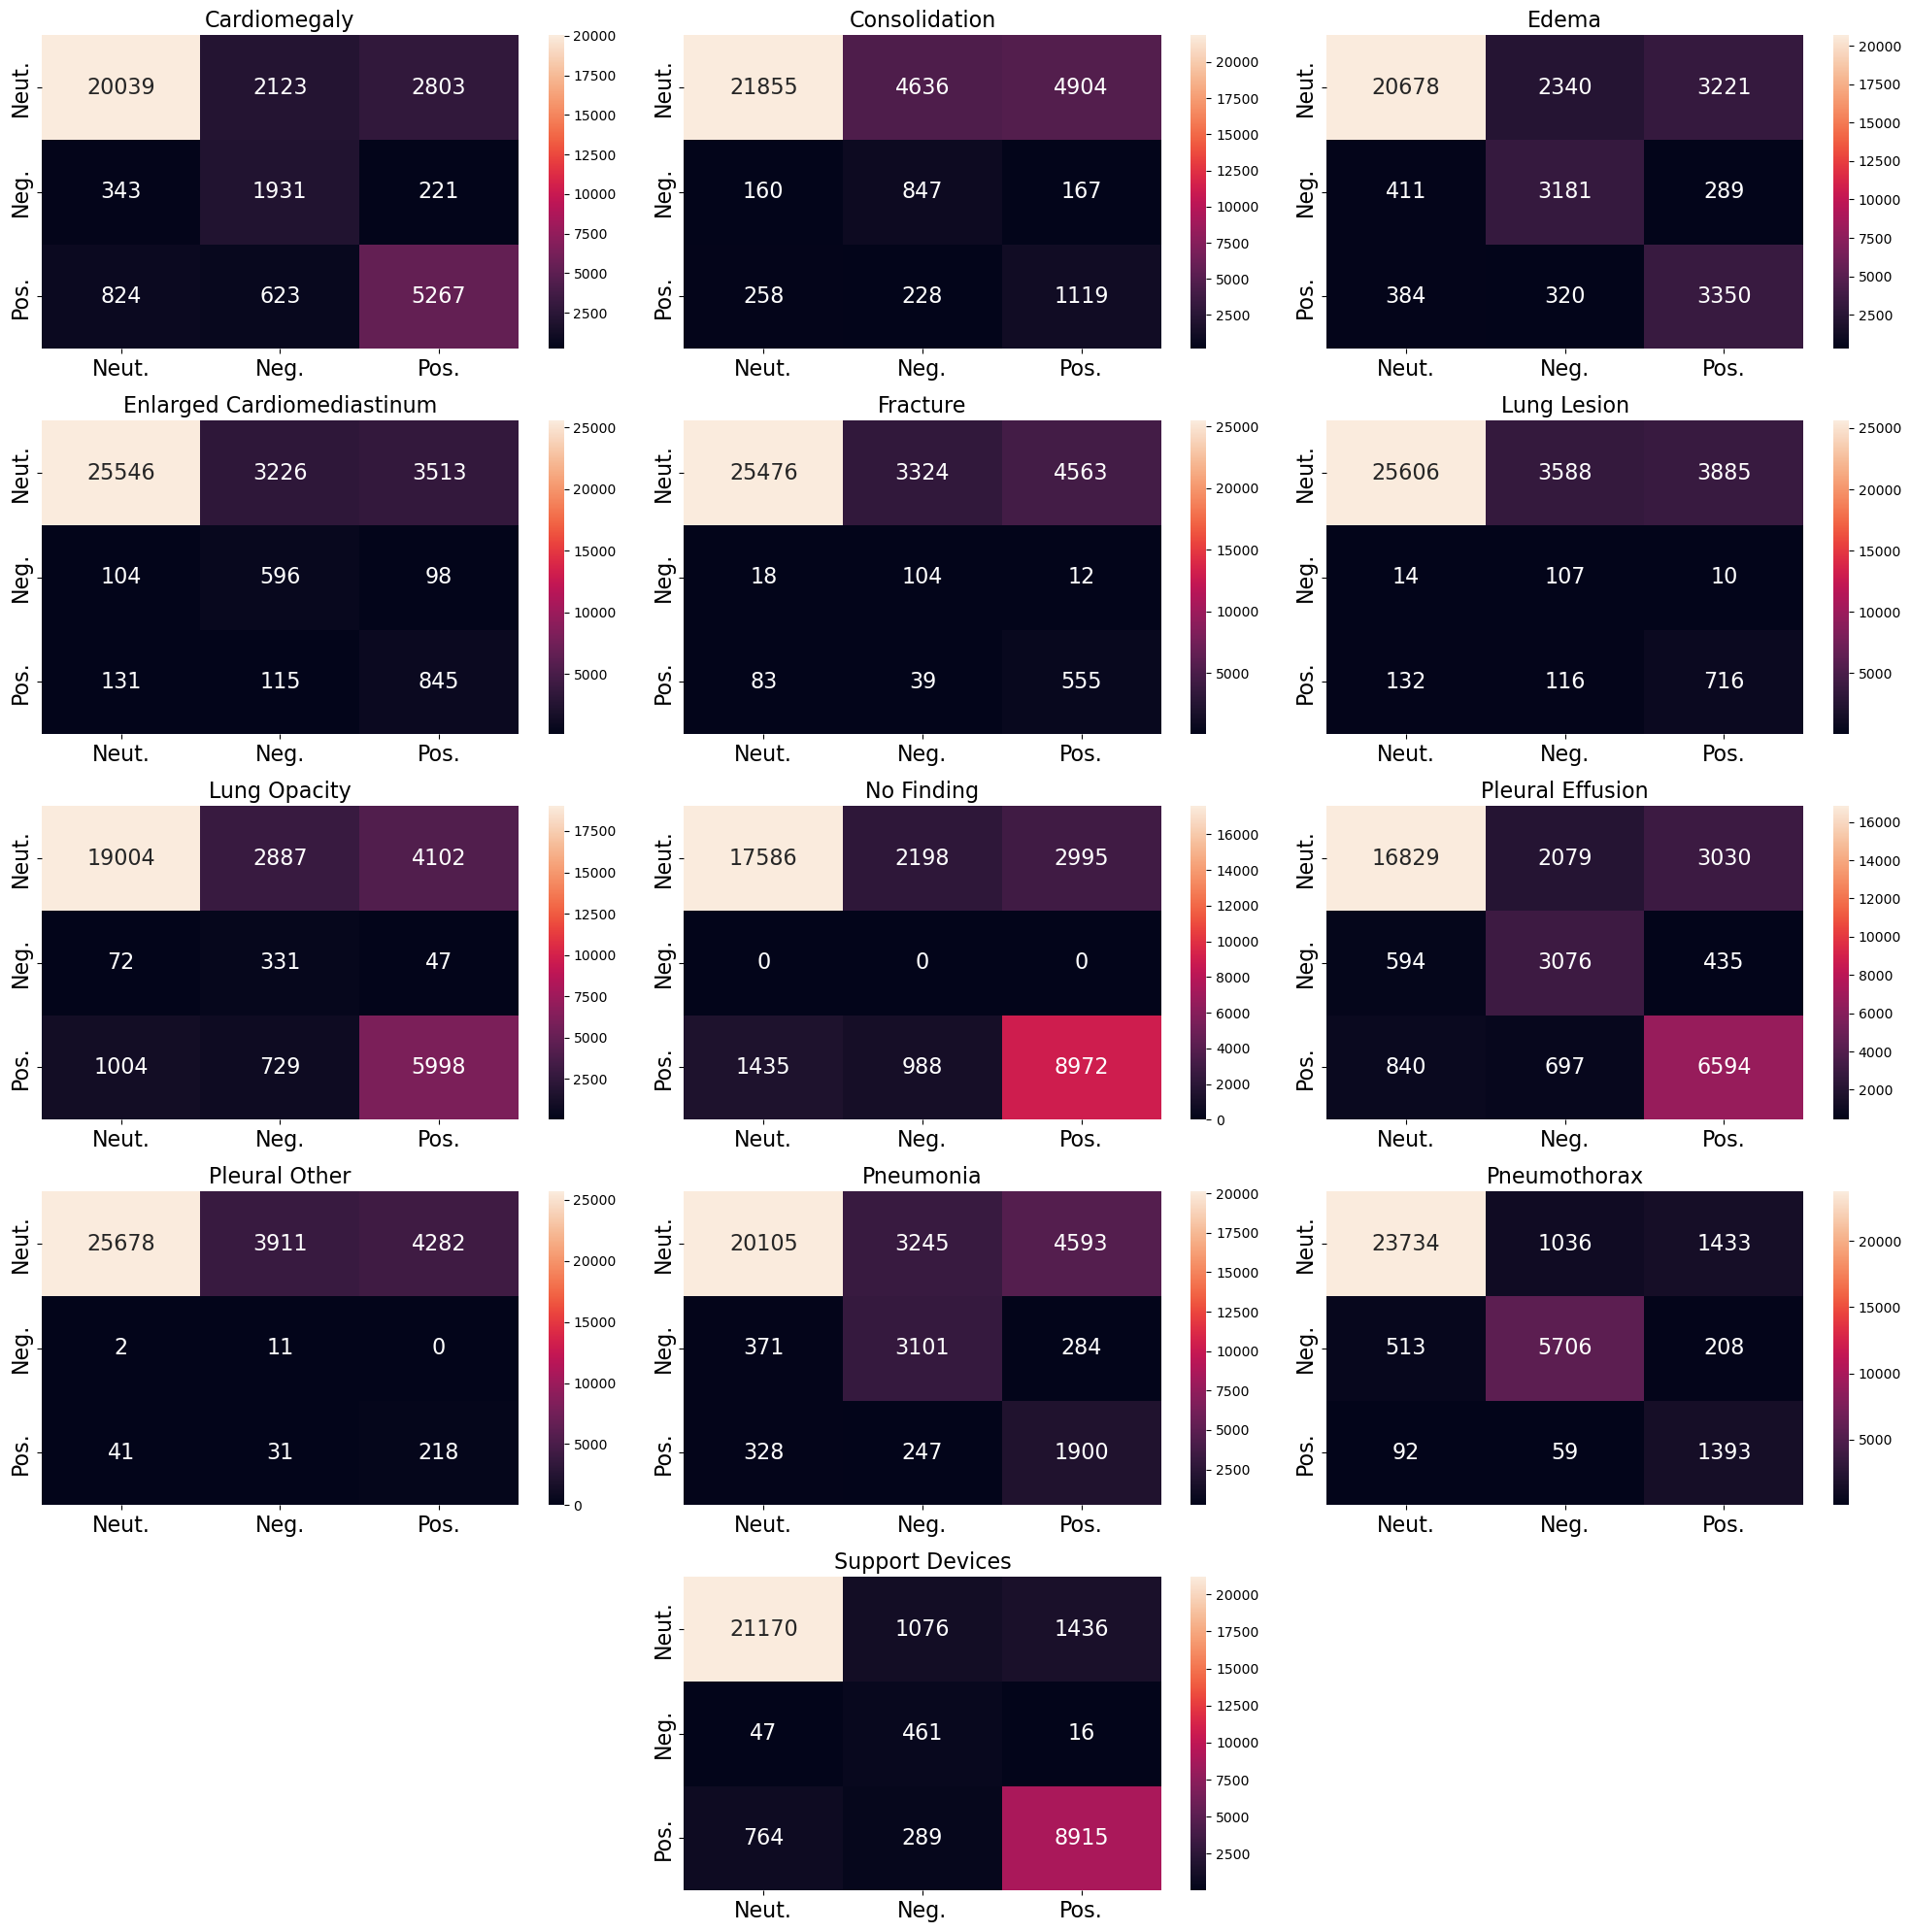

In [174]:
# import confusion_matrix
from sklearn.metrics import confusion_matrix
# I want a grid of 3 x 5, displaying sns heatmaps for each disease
# each heatmap is a confusion matrix of 3 x 3
# each heatmap should have a title with the disease name

# We need to create a figure with 5 rows and 3 columns
# We can use plt.subplots() for this, make the size of the figure (20, 20)
fig, axes = plt.subplots(5, 3, figsize=(20, 20))

# We need to iterate over the axes and the diseases
# We can use zip() for this

for ax, col in zip(axes.flatten(), labels.columns[1:]):
    # if we are in the bottom row, we want to plot in the middle column
    if ax in axes[4, :]:
        ax = axes[4, 1]

    # create confusion matrix for vision model
    cm_vision = confusion_matrix(labels[col], combined_vit_pred[col])
    # plot heatmap for vision model, make font size inside the cells larger
    sns.heatmap(cm_vision, annot=True, ax=ax, fmt='g', annot_kws={"size": 16})
    ax.set_title(col, fontsize=16)
    # replace y labels, -1: "Neutral", 0: "Negative", 1: "Positive", fontsize=16
    ax.set_yticklabels(["Neut.", "Neg.", "Pos."], fontsize=16)
    # replace x labels, -1: "Neutral", 0: "Negative", 1: "Positive"
    ax.set_xticklabels(["Neut.", "Neg.", "Pos."], fontsize=16)
    
# Put hte plot in the bottom row in the middle, the left adn right plots are empty
fig.delaxes(axes[4, 0])
fig.delaxes(axes[4, 2])



plt.tight_layout()
plt.show()
 




In [160]:
# save all predictions again
vit_pred.to_csv(PATH_VIT_PRED, index=False)
combined_vit_pred.to_csv(PATH_COMBINED_VIT_PRED, index=False)


## Plot 3: hyperparameter tuning

In [ ]:
# For every disease, find the micro average precision and 